# Surfs Up! 
#### Congratulations! You've decided to treat yourself to a long holiday vacation in Honolulu, Hawaii! To help with your trip planning, you need to do some climate analysis on the area using Python and SQLAlchemy.


In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# %load_ext nb_black

# Reflect Tables into SQLAlchemy ORM

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import func

In [3]:
Base = automap_base()

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

Base.prepare(engine, reflect=True)

In [4]:
# Use Inspector To View Tables & Print Schema 
inspector = inspect(engine)
print(inspector.get_table_names())

['measurement', 'station']


In [5]:
# Print 'Measurement' Class structure 
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [6]:
# Print 'Station' Class structure 
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [7]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
session = Session(engine)

# Exploratory Climate Analysis

* Design a query to retrieve the last 12 months of precipitation data and plot the results

* Calculate the date 1 year ago from the last data point in the database

* Perform a query to retrieve the data and precipitation scores

* Save the query results as a Pandas DataFrame and set the index to the date column

In [9]:
end_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
end_date

('2017-08-23')

In [10]:
past_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
past_year

datetime.date(2016, 8, 23)

In [11]:
# Query Past Year Precipitation Results 
prcp_cmd = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= past_year).all()
prcp_cmd

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [12]:
# Make Pandas DataFrame from Query Results 
# Clean Up Results
prcp_df = pd.DataFrame(prcp_cmd, columns=['Date', 'Precipitation']).sort_values('Date').dropna().set_index('Date')
prcp_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


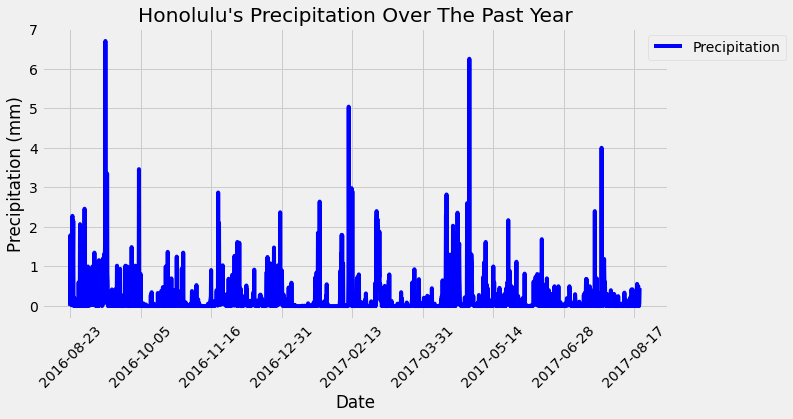

In [13]:
# Plot The Results 
prcp_df.plot(rot=45, color="blue", figsize=(10,5))
plt.title("Honolulu's Precipitation Over The Past Year")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.legend(loc="upper right", bbox_to_anchor=(1.2,1))
plt.savefig("Precipitation.png")
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# Query Total Number Of Stations In The Dataset
stations_cmd = session.query(Station).distinct().count()
stations_cmd

9

In [16]:
# Query Most Active Stations 
# List the stations and the counts in descending order
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Query Min, Max, and Average Temp Recorded From Most Active Stations  
session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs))\
    .filter(Measurement.station==most_active_stations[0][0]).all()

[(54.0, 85.0, 71.66378066378067)]

In [18]:
# Choose the station with the highest number of temperature observations.
most_active_stations[0][0]

'USC00519281'

In [19]:
# Query Last 12 Months of Temp Observation Data From Most Active Station

most_active_temp = (
    session.query(Measurement.tobs)
    .filter(Measurement.station == most_active_stations[0][0])
    .filter(Measurement.date >= past_year)
    .all()
)
most_active_temp 

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

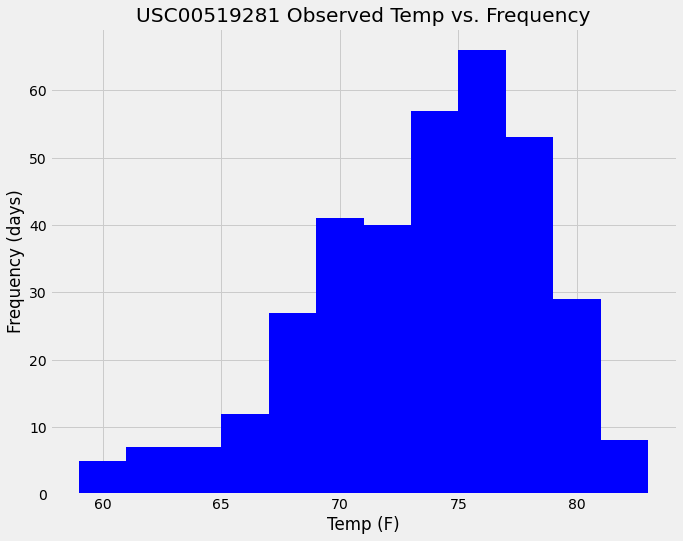

In [20]:
# Plot The Results 
pd.DataFrame(most_active_temp).hist(bins=12, figsize=(10,8), color="blue")
plt.title("USC00519281 Observed Temp vs. Frequency")
plt.xlabel("Temp (F)")
plt.ylabel("Frequency (days)")
plt.savefig("Temp_Frequency.png")
plt.show()

In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [22]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax for your trip 
trip = calc_temps('2016-12-25', '2017-1-02')
trip

[(58.0, 74.06944444444444, 87.0)]

In [23]:
trip_df = pd.DataFrame(trip, columns=['trip_min', 'trip_max', 'trip_avg'])
trip_df

,trip_min,trip_max,trip_avg
0,58.0,74.069444,87.0


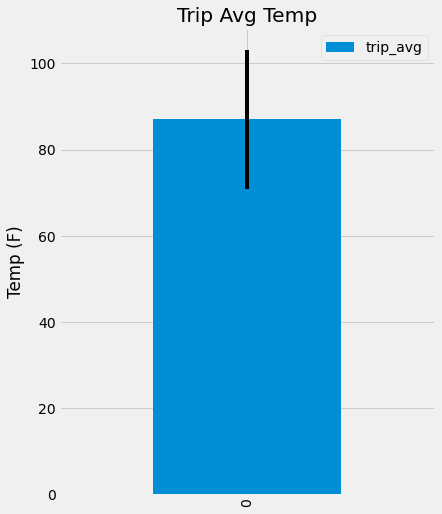

In [24]:
# Plot The Results 
trip_df.plot.bar(y='trip_avg', yerr=(trip_df['trip_max'] - trip_df['trip_min']), title='Trip Avg Temp', figsize=(6,8))
plt.ylabel("Temp (F)")
plt.savefig("TripAvgTemp.png")
plt.show()

In [31]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
trip_start = '2016-12-25'
trip_end = '2017-1-02'

sel = [Station.station, 
      Station.name, 
      Station.latitude, 
      Station.longitude, 
      Station.elevation, 
      func.sum(Measurement.prcp)]

trip_temp_df = session.query(*sel).filter(Measurement.date >= trip_start).filter(Measurement.date <= trip_end).filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
pd.DataFrame(trip_temp_df, columns = ["Station ID","Name","Latitude","Longitude","Elevation","Total Precipitation"])

,Station ID,Name,Latitude,Longitude,Elevation,Total Precipitation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,75.22
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,45.10
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,36.04
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,27.56
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,23.04
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,10.87
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,3.39
